In [93]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, root_mean_squared_log_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('resources/train.csv')

print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [94]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [96]:
df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [97]:
print(df.isna().sum().sum())

7829


In [98]:
df.isna().sum().nlargest(81)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [99]:
df.isnull().sum().nlargest(81)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [100]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns>0]
df.drop(null_columns.index, axis=1, inplace=True)


# df_num = df.select_dtypes(include=['float64', 'int64'])
# for colonne in df_num.columns:
#     df[colonne] = df[colonne].fillna(df[colonne].median())
# 
# # Filling missing String object values
# df_obj = df.select_dtypes(include=['object'])
# for colonne in df_obj.columns:
#     df[colonne] = df[colonne].fillna('NONE')



In [101]:
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [102]:
# Sélectionner les caractéristiques (X) et la cible (y)

# Xord = df[['OverallQual', 'BsmtQual', 'KitchenQual','FireplaceQu','ExterQual']]
# Xhot = df[['Neighborhood','LotArea', 'YearBuilt', 'FullBath','Foundation', 'GarageCars','BsmtExposure','GrLivArea', 'TotRmsAbvGrd', '1stFlrSF',  'TotalBsmtSF']]
# X = df[['Neighborhood','LotArea','OverallQual', 'YearBuilt', 'FullBath',
#         'Foundation', 'BsmtQual', 'KitchenQual', 'GarageCars','FireplaceQu',
#         'BsmtExposure','GrLivArea', 'TotRmsAbvGrd', '1stFlrSF', 'ExterQual', 'TotalBsmtSF']]  # Caractéristiques pertinentes pour estimer le prix
# y = df['SalePrice']  # Ce que l'on cherche à déterminer

In [103]:
df = df[df['SalePrice'] <= 400000]

In [104]:
X = df.drop(columns=['SalePrice','Id'])
y = df['SalePrice']

In [105]:
# one_hot_encoder = OneHotEncoder()
# #X = one_hot_encoder.fit_transform(X)
# Xhot = one_hot_encoder.fit_transform(Xhot)
# 
# overall_qual_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# bsmt_qual_order = ['NONE', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
# kitchen_qual_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
# fireplace_qual_order = bsmt_qual_order
# exter_qual_order = kitchen_qual_order
# 
# ordinal_encoder = OrdinalEncoder(categories=[overall_qual_order, bsmt_qual_order, kitchen_qual_order, fireplace_qual_order, exter_qual_order])
# Xord = ordinal_encoder.fit_transform(Xord)

In [106]:
one_hot_encoder = OneHotEncoder()
X = one_hot_encoder.fit_transform(X)

In [107]:
#Mettre en DataFrames
# Xhot_df = pd.DataFrame(Xhot.toarray())
# Xord_df = pd.DataFrame(Xord)

In [108]:
# Concaténer les DataFrames
# X = pd.concat([Xhot_df,Xord_df], axis=1)

In [109]:
# Séparer les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [110]:
from datetime import datetime
# Créer un modèle
model_lasso = Lasso(max_iter=30000)
model_rfg = RandomForestRegressor(random_state=42)

# Entraîner le modèle sur les données d'entraînement encodées
model_lasso.fit(X_train, y_train)
model_rfg.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_val)
y_pred_rfg = model_rfg.predict(X_val)

y_pred = (y_pred_lasso + y_pred_rfg) / 2

# Prédire les valeurs sur les données de validation
#y_pred = model_lasso.predict(X_val)

print('TRAINING ENDED AT ',datetime.now())

TRAINING ENDED AT  2024-02-27 23:26:48.378247


In [111]:
y_val

124     181000
1217    229456
471     190000
358     130000
1079    126000
         ...  
1442    310000
785     161500
1242    170000
602     220000
1200    116050
Name: SalePrice, Length: 144, dtype: int64

In [112]:
y_pred

array([177812.40969463, 245953.92201155, 194895.61747883, 127148.5942544 ,
       127986.99502375, 108284.36639607, 150240.1085332 , 346492.76436553,
       140550.38050567, 209064.94896275, 197017.03343654, 147763.28792762,
       187197.00766269, 182175.4880657 , 242547.79659658, 142745.44643182,
       185709.14732483, 117853.67027786, 178159.03955135, 129848.50275415,
        80153.19152665, 250481.51639843, 110708.7166487 , 168902.86743443,
       126472.12853663, 200753.96348801, 155376.52306454, 129376.52016187,
       226563.84377396, 112069.77807583, 130029.66315224,  86884.43424904,
       161317.09304235, 155835.3950397 , 352136.81140695, 253826.07403617,
       143632.35765944, 138585.02416781, 268110.27103421, 164114.63395561,
       153136.38025261, 161422.75734715, 193741.06079786, 133123.67651249,
       137830.86632079, 116307.8716751 , 104290.62607542, 190627.32075896,
       155222.41711953, 129145.16806475, 190387.69634555, 131579.34234701,
       140364.44538806, 1

In [113]:

#METRICS - Calculer l'exactitude du modèle
print('Metrics generated at : ',datetime.now())
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('RMSE : ',rmse)

mean_percentage_error = (rmse / np.mean(y_val)) * 100
print('Pourcentage d\'erreur : ',mean_percentage_error,'%')

r2 = r2_score(y_val,y_pred)
print('R2 : ',r2)

#A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.
msle = mean_squared_log_error(y_val, y_pred)
print('MSLE : ', msle)

rmsle = root_mean_squared_log_error(y_val, y_pred)
print('RMSLE : ', rmsle)

Metrics generated at :  2024-02-27 23:26:48.452587
RMSE :  27275.67741589949
Pourcentage d'erreur :  15.142179544908254 %
R2 :  0.8392429215791949
MSLE :  0.02299245899868225
RMSLE :  0.15163264489773384


In [114]:
# Pourcentage d'écart moyen
diff = np.abs(y_val - y_pred)

# Calculer l'écart moyen
ecart_moyen = np.mean(diff)

max_ecart = np.max(diff)
min_ecart = np.min(diff)

# Calculer la moyenne de y_val
moyenne_y_val = np.mean(y_val)

# Convertir l'écart moyen en pourcentage d'écart moyen
ecart_moyen_pct = (ecart_moyen / moyenne_y_val) * 100

print("Pourcentage d'écart moyen:", ecart_moyen_pct, "%")
print("Plus gros écart constaté :", max_ecart, "€")
print("Plus petit écart constaté :", min_ecart, "€")

Pourcentage d'écart moyen: 10.54033230293025 %
Plus gros écart constaté : 96262.58763878443 €
Plus petit écart constaté : 51.86605686083203 €


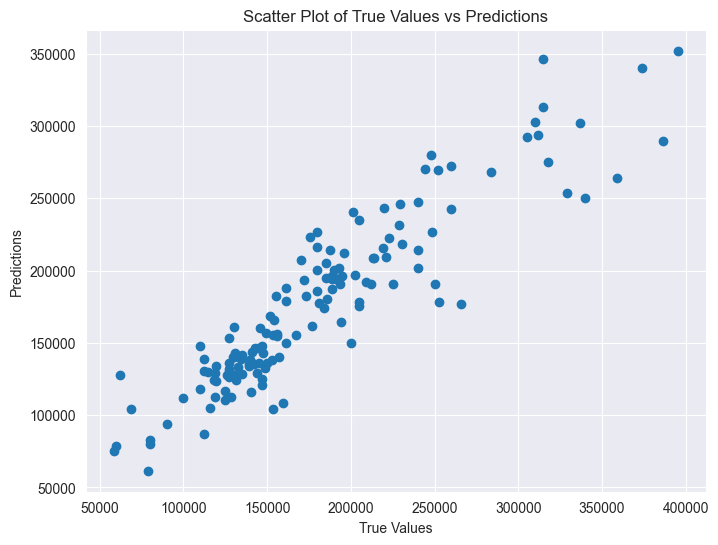

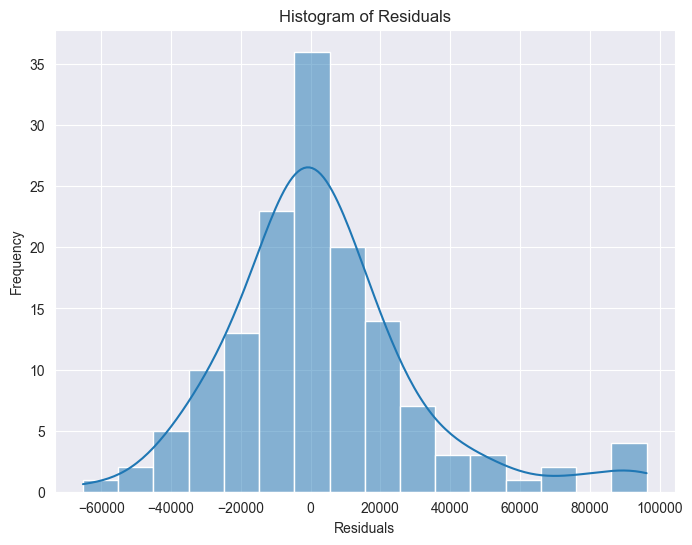

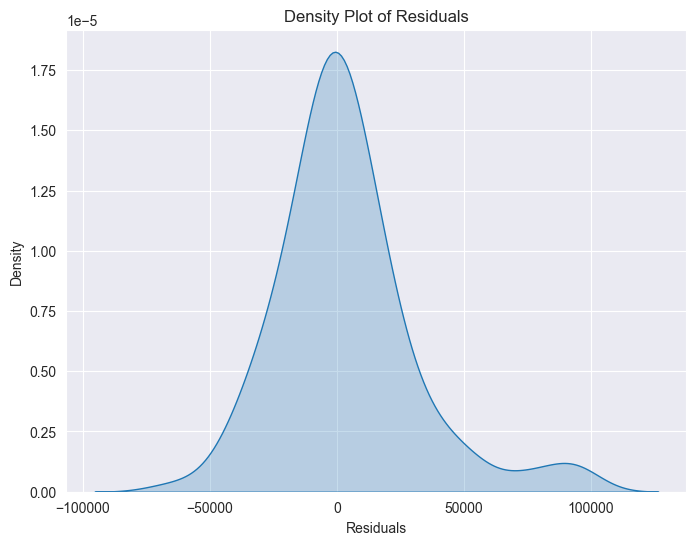

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot des prédictions par rapport aux vraies valeurs
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True Values vs Predictions')
plt.show()

# Histogramme des résidus
residuals = y_val - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Courbe de densité des résidus
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals')
plt.show()